In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
%matplotlib inline
from config import ROOT_DIR, SQL_USER, SQL_PWD, SQL_SERVER, SQL_DRIVER, SQL_DB 
from sql_con import SQLConnection, read_contents
import csv

#### Read from car_prices dataset and correct/transform malformed pattern before reading to final dataframe
#### Run info and describe dataframe methods to get a quick understanding of the data

In [2]:
raw_df = pd.read_csv(rf"{ROOT_DIR}/data/car_prices.csv", delimiter="\t")

In [3]:
raw_df

,"year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate"
0,"2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg5..."
1,"2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg5..."
2,"2014,BMW,3 Series,328i SULEV,Sedan,automatic,w..."
3,"2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f13..."
4,"2014,BMW,6 Series Gran Coupe,650i,Sedan,automa..."
...,...
558832,"2015,Kia,K900,Luxury,Sedan,,knalw4d4xf6019304,..."
558833,"2012,Ram,2500,Power Wagon,Crew Cab,automatic,3..."
558834,"2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58c..."
558835,"2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al..."


In [4]:
# clean up the data malformation in given csv file
to_replace = "SE PZEV w/Connectivity, Navitgation" # csv malformation
value = "SE"
raw_df.replace(to_replace=to_replace, value=value, regex=True, inplace=True)

In [5]:
raw_df.to_csv(rf"{ROOT_DIR}/data/car_sales_cleaned.csv", quoting=csv.QUOTE_NONE, sep="\t", index=False)

In [6]:
df = pd.read_csv(rf"{ROOT_DIR}/data/car_sales_cleaned.csv", delimiter=",", dtype={"year": str, "mmr": "float", "sellingprice": "float"})

In [7]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [8]:
# parse saledate column to datetime along with timezone
df["saledate"].str.split("GMT", expand=True)[0]
df["saledate"] = pd.to_datetime(df["saledate"].str.split("GMT", expand=True)[0]).dt.tz_localize("US/Pacific")

In [9]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500.0,2014-12-16 12:30:00-08:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500.0,2014-12-16 12:30:00-08:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00-08:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00-08:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 12:30:00-08:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype                     
---  ------        --------------   -----                     
 0   year          558837 non-null  object                    
 1   make          548536 non-null  object                    
 2   model         548438 non-null  object                    
 3   trim          548186 non-null  object                    
 4   body          545642 non-null  object                    
 5   transmission  493480 non-null  object                    
 6   vin           558837 non-null  object                    
 7   state         558837 non-null  object                    
 8   condition     547043 non-null  float64                   
 9   odometer      558743 non-null  float64                   
 10  color         558088 non-null  object                    
 11  interior      558088 non-null  object                    
 12  se

In [11]:
# instantiate sql connection object to perform operations on sql server
sqlConn = SQLConnection(SQL_DRIVER, SQL_SERVER, SQL_DB, SQL_USER, SQL_PWD)

# create car sales data definition language
sqlConn.execute_ddl_dml(read_contents(rf"{ROOT_DIR}/sql/car_sales_ddl.sql"))

In [12]:
# insert data into car sales table
insert_data = df.replace(to_replace=np.nan, value=None).values.tolist()
sqlConn.insert_records(read_contents(rf"{ROOT_DIR}/sql/car_sales_insert.sql"), insert_data)

In [13]:
# get summary statistics for numeric columns
pd.read_sql(read_contents(rf"{ROOT_DIR}/sql/car_sales_summary_stats.sql"), sqlConn.get_conn_odbc()).set_index("stats")

C:\Users\meeta\AppData\Local\Temp\ipykernel_4592\3484639202.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(read_contents(rf"{ROOT_DIR}/sql/car_sales_summary_stats.sql"), sqlConn.get_conn_odbc()).set_index("stats")


,condition,odometer,mmr,selling price
stats,,,,
count,547043.000000,558743.000000,558837.000000,558837.000000
first_quartile,2.700000,28371.000000,7100.000000,6900.000000
max,5.000000,999999.000000,182000.000000,230000.000000
mean,3.424511,68320.000000,13769.319811,13611.207538
median (second_quartile),3.600000,52254.000000,12250.000000,12100.000000
min,1.000000,1.000000,25.000000,1.000000
std,0.949462,53398.058707,9679.649690,9749.444610
third_quartile,4.200000,99109.000000,18300.000000,18200.000000


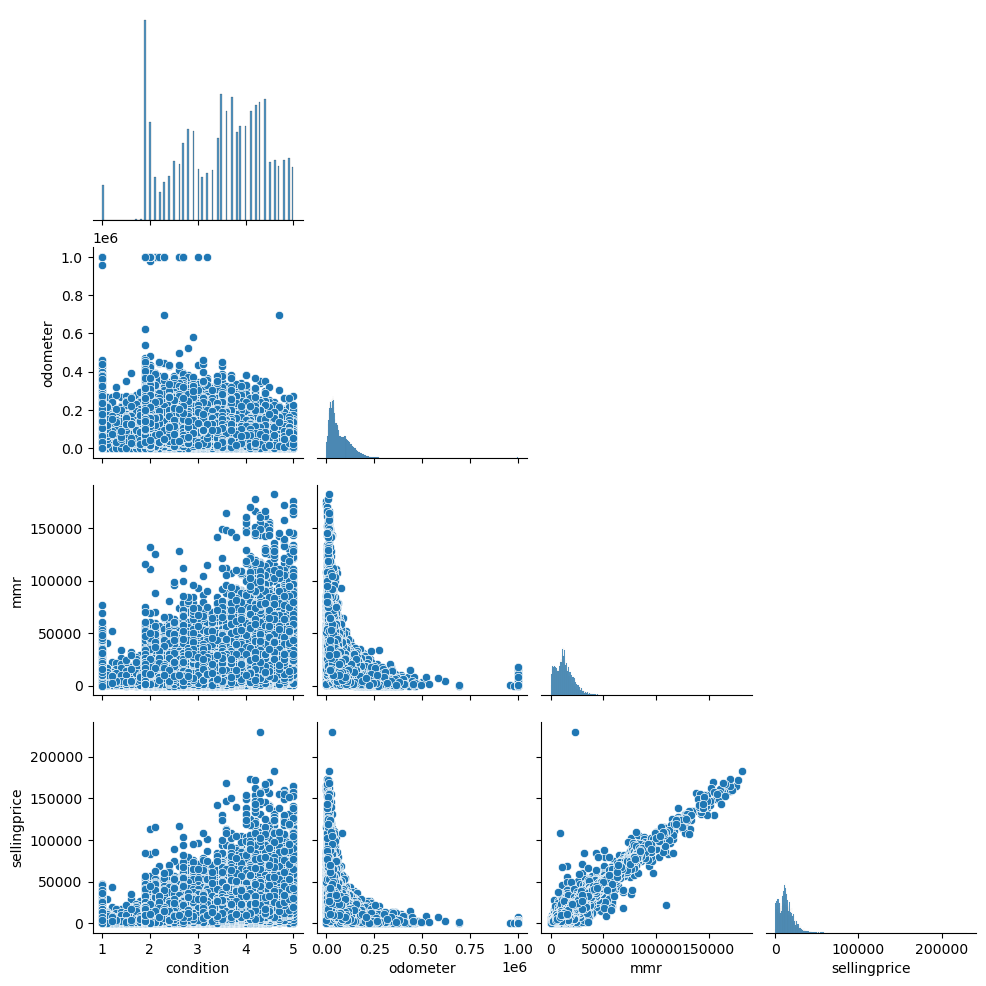

In [14]:
# Turn upper corner of the pairplot matrix off to avoid redundancy
sns.pairplot(df, corner=True)

#### Use pairplot on filtered data for following body types 
- SUV
- Sedan
- Convertible
- Coupe

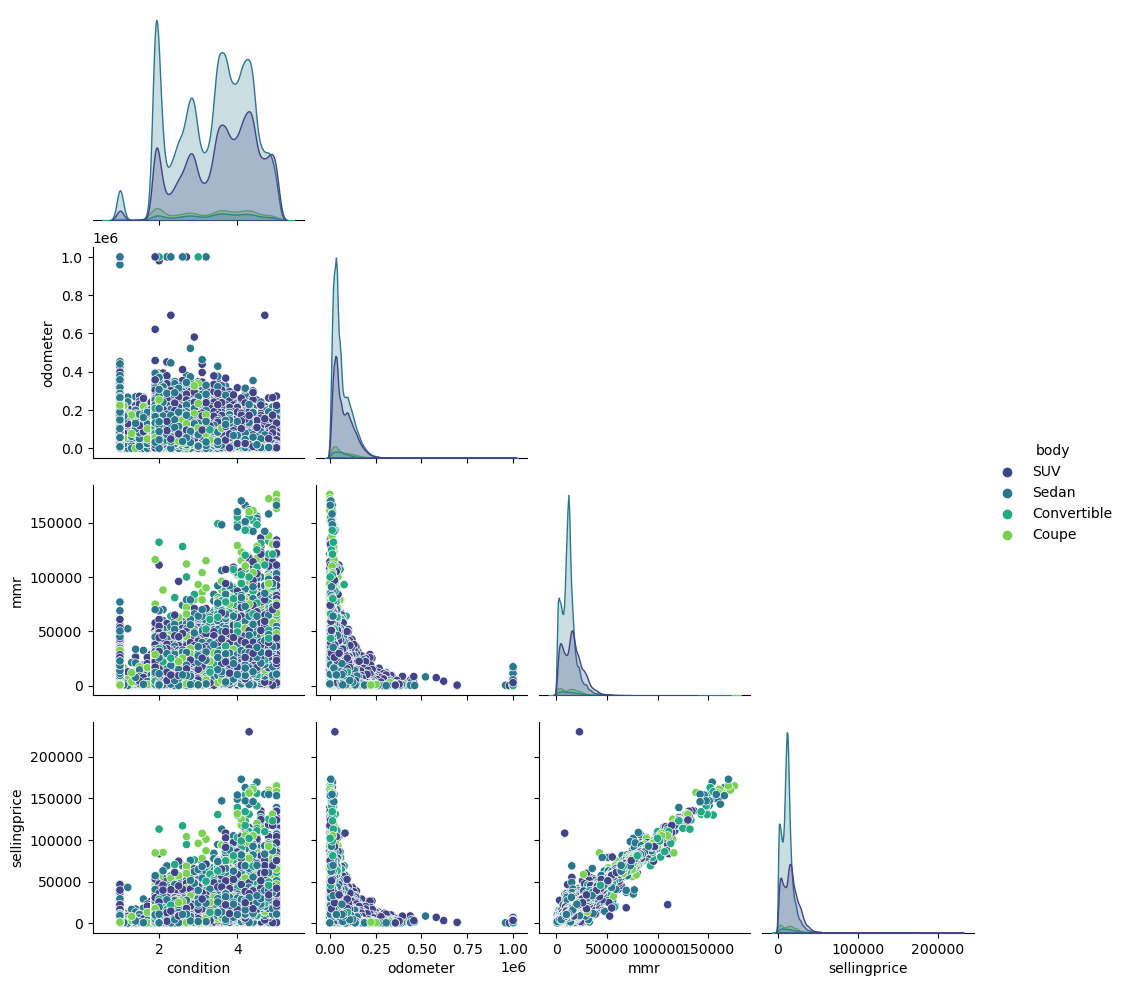

In [15]:
# Turn upper corner of the pairplot matrix off to avoid redundancy
# use hue parameter to map different colors to body types
body_types = ["SUV", "Sedan", "Convertible", "Coupe"]
sns.pairplot(
    df.query("body in @body_types"),
    corner=True,
    hue='body',
    palette="viridis"
)
# using hue parameter shows smooth kernel density estimation (KDE) curves instead of discrete histogram distributions

#### Correlation Heat Map
- Plot a heatmap of the correlation between the numeric variables. 
- Does it make sense year and condition/odometer are negatively correlated?

In [16]:
# extract age of car in days in new column
df["car_age (days)"] = (pd.to_datetime("now", utc=True) - pd.to_datetime(df["year"], format="%Y").dt.tz_localize("UTC")).dt.days
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age (days)
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500.0,2014-12-16 12:30:00-08:00,2995
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500.0,2014-12-16 12:30:00-08:00,2995
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00-08:00,3360
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00-08:00,2995
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 12:30:00-08:00,3360


In [17]:
# capture correlation matrix in dataframe
df_corr = df.loc[:, ["car_age (days)", "condition", "odometer", "mmr", "sellingprice"]].corr()
df_corr

,car_age (days),condition,odometer,mmr,sellingprice
car_age (days),1.000000,-0.551232,0.772731,-0.596596,-0.586454
condition,-0.551232,1.000000,-0.538826,0.485026,0.538774
odometer,0.772731,-0.538826,1.000000,-0.588090,-0.582380
mmr,-0.596596,0.485026,-0.588090,1.000000,0.983632
sellingprice,-0.586454,0.538774,-0.582380,0.983632,1.000000


<AxesSubplot: >

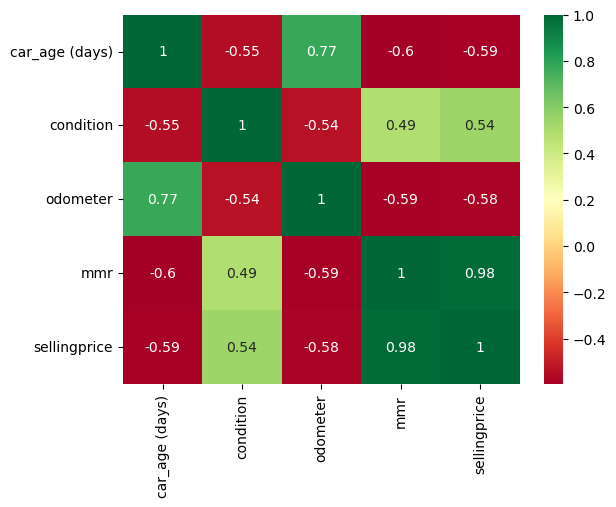

In [18]:
sns.heatmap(
    df_corr,
    cmap="RdYlGn",
    annot=True
)

#### Value Retention
- Filter your data down to the following values of make (brand): 
    - Ford
    - BMW
    - Toyota
    - Chevy
- Build a linear relationship plot comparing odometer (distance car has travelled) vs sellingprice, broken by make
- If you want to fit a regression line with scipy.stats, use dropna() on dataframe first

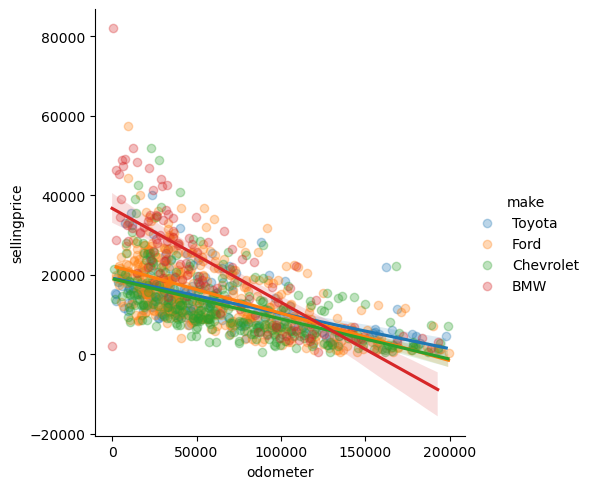

In [19]:
brand_list = ["Ford", "BMW", "Toyota", "Chevrolet"]
sns.lmplot(
    x="odometer",
    y="sellingprice",
    data=df.query("make in @brand_list and sellingprice < 150000 and odometer < 200000").sample(1000),
    hue="make",
    scatter_kws={"alpha": 0.3}
)

In [20]:
from scipy.stats import linregress

# get metrics for linear regression (for all makes) for above relationship
df_regress = df.dropna()
linregress(x=df_regress["odometer"], y=df_regress["sellingprice"])

LinregressResult(slope=-0.10685542121912882, intercept=20817.42477491993, rvalue=-0.5773593995519897, pvalue=0.0, stderr=0.0002198702844463866, intercept_stderr=18.5870105948452)

In [21]:
# get metrics for linear regression (for makes in brand list) for above relationship
for brand in brand_list:
    df_regress = df.query("make == @brand").dropna()
    print(f"Linear regression for {brand}")
    print(linregress(x=df_regress["odometer"], y=df_regress["sellingprice"]))
    print()

Linear regression for Ford
LinregressResult(slope=-0.09953734771818888, intercept=20840.011075886523, rvalue=-0.5766856281088094, pvalue=0.0, stderr=0.0004954231772393875, intercept_stderr=38.55451158159915)

Linear regression for BMW
LinregressResult(slope=-0.2225033042967634, intercept=35567.9797446848, rvalue=-0.7465574337202435, pvalue=0.0, stderr=0.0014986443795278743, intercept_stderr=120.73425197603864)

Linear regression for Toyota
LinregressResult(slope=-0.07594777614361674, intercept=17813.017107685304, rvalue=-0.6332091990580268, pvalue=0.0, stderr=0.0004940182170495778, intercept_stderr=44.79937606527679)

Linear regression for Chevrolet
LinregressResult(slope=-0.08841045962774961, intercept=18705.587357485063, rvalue=-0.5460888174611522, pvalue=0.0, stderr=0.0005828433094248876, intercept_stderr=55.07879089776883)



#### Categorical Variable Relationships
- Bin the condition variable into increments of 0.5
- Build a bar plot of average sellling price by condition bin

In [22]:
# distribute data into condition bins based on condition column
df = pd.read_sql(read_contents(rf"{ROOT_DIR}/sql/condition_bin.sql"), sqlConn.get_conn_odbc(), index_col=["ID"])
df.head()

C:\Users\meeta\AppData\Local\Temp\ipykernel_4592\392756771.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(read_contents(rf"{ROOT_DIR}/sql/condition_bin.sql"), sqlConn.get_conn_odbc(), index_col=["ID"])


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,selling_price,sale_date,Created,condition_bins
ID,,,,,,,,,,,,,,,,,,
9068,2014,Dodge,Avenger,SE,Sedan,automatic,1c3cdzab0en215401,fl,NaN,15055.0,silver,gray,enterprise vehicle exchange / tra / rental / t...,11950.0,9200.0,2014-12-22 09:30:00,2023-03-14 22:42:26.417,None
12151,2010,Ford,F-150,Lariat,SuperCrew,automatic,1ftfw1ev1afb34498,pa,NaN,36339.0,black,—,richland auto mart,26000.0,26500.0,2014-12-17 09:30:00,2023-03-14 22:42:26.480,None
15,2014,Chevrolet,Cruze,2LT,Sedan,automatic,1g1pe5sbxe7120097,ca,NaN,15686.0,blue,black,avis rac/san leandro,13900.0,10600.0,2014-12-16 12:00:00,2023-03-14 22:42:26.170,None
21460,2006,Saturn,VUE,Base,SUV,automatic,5gzcz63416s823505,tx,NaN,77549.0,green,—,cm investments,4775.0,3000.0,2014-12-22 10:00:00,2023-03-14 22:42:26.720,None
6022,2013,Acura,ILX,Base,Sedan,automatic,19vde1f37de007205,ca,NaN,20354.0,gray,—,apexcars net,16650.0,18800.0,2014-12-17 12:30:00,2023-03-14 22:42:26.323,None


In [23]:
# get average selling price for each condition bin
pd.read_sql(read_contents(rf"{ROOT_DIR}/sql/condition_bin_avg_price.sql"), sqlConn.get_conn_odbc()).set_index("condition_bins")

C:\Users\meeta\AppData\Local\Temp\ipykernel_4592\3963690811.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(read_contents(rf"{ROOT_DIR}/sql/condition_bin_avg_price.sql"), sqlConn.get_conn_odbc()).set_index("condition_bins")


,avg_price
condition_bins,
1-1.5,3916.113036
1.5-2.0,5272.912709
2.0-2.5,8131.216452
2.5-3.0,10350.570446
3.0-3.5,12637.256656
3.5-4.0,15534.957436
4.0-4.5,18493.709994
4.5-5.0,22121.181117


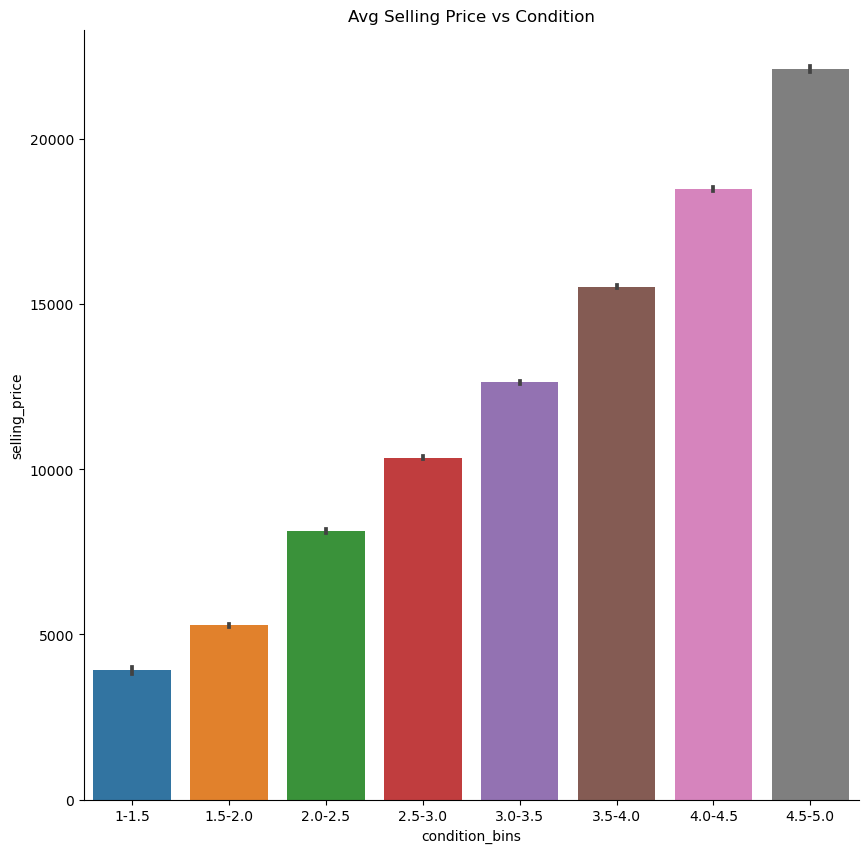

In [24]:
# plot average selling price vs condition graphically
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(
    x="condition_bins",
    y="selling_price",
    data=df
)

ax.set_title("Avg Selling Price vs Condition")
sns.despine()

In [29]:
avgs = pd.read_sql(read_contents(rf"{ROOT_DIR}/sql/make_cond_price.sql"), sqlConn.get_conn_odbc())
avgs.set_index("make", inplace=True)
avgs.columns.name = "condition"
avgs

C:\Users\meeta\AppData\Local\Temp\ipykernel_4592\537141870.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avgs = pd.read_sql(read_contents(rf"{ROOT_DIR}/sql/make_cond_price.sql"), sqlConn.get_conn_odbc())


condition,1-1.5,1.5-2.0,2.0-2.5,2.5-3.0,3.0-3.5,3.5-4.0,4.0-4.5,4.5-5.0
make,,,,,,,,
Ford,3489.068093,5246.293789,8526.924575,10929.816738,13368.662531,15358.592519,17816.320038,20803.418436
Hyundai,6086.830144,5113.969363,7279.409027,8597.000404,10312.067568,11704.661821,13482.523591,16497.018190
Chevrolet,4477.366245,5357.200328,7404.252278,10297.132087,11604.625092,14426.420594,16728.651884,21582.407275
Honda,2130.562500,4996.020954,7896.300373,9156.233933,11591.343582,13714.775844,16405.194175,19317.726330
BMW,4326.315789,6869.539683,10519.613160,12817.205768,16448.981112,21950.780619,28804.737819,35940.835412
Chrysler,4465.507246,4232.658170,5315.813646,9005.057656,9202.004673,14794.996091,15176.900158,18384.387548
Kia,4146.354167,4207.580300,6639.857005,8142.480229,10236.927282,11993.599421,13986.038947,16246.605411
Nissan,5119.914244,5504.421533,8428.547048,10011.264328,11888.321401,13056.059795,14653.091957,16105.622175
Dodge,4302.322134,5242.791508,7095.700618,9816.475340,10508.818787,14045.508596,14904.161614,18425.152042
